# Ford GoBike Bay Wheels Data Exploration
## by Kimberley Moore

## Preliminary Wrangling

This document explores a dataset containing Bay Wheels's bike trip data for 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
import zipfile
from io import BytesIO
from datetime import datetime

%matplotlib inline

In [2]:
folder_name = 'fordgobike-2018'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
urls_list = ['https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip']

for url in urls_list:
    r = requests.get(url)
    unzipped_file = zipfile.ZipFile(BytesIO(r.content))
    unzipped_file.extractall(folder_name)

In [3]:
file_list=[]
for file_name in os.listdir(folder_name):
    file = pd.read_csv(folder_name+'/'+file_name)
    file_list.append(file)

fordbike_2018 = pd.concat(file_list)

In [4]:
fordbike_2018.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81861,374,2018-12-11 18:59:01.2990,2018-12-11 19:05:15.8870,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,1107,Subscriber,NaN,NaN,No
135721,1456,2018-05-08 16:21:37.1040,2018-05-08 16:45:53.2530,16.0,Steuart St at Market St,37.794130,-122.394430,133.0,Valencia St at 22nd St,37.755213,-122.420975,4000,Subscriber,1974.0,Male,No
93697,6278,2018-08-16 14:35:46.5680,2018-08-16 16:20:25.0650,190.0,West St at 40th St,37.830223,-122.270950,190.0,West St at 40th St,37.830223,-122.270950,1420,Customer,1996.0,Male,No
72752,999,2018-02-08 19:42:55.9840,2018-02-08 19:59:35.1050,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,1013,Subscriber,1968.0,Male,No
135676,922,2018-08-09 18:21:24.4430,2018-08-09 18:36:47.0290,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,3491,Subscriber,1984.0,Female,No
104933,172,2018-07-16 14:54:57.2480,2018-07-16 14:57:50.1760,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,2353,Subscriber,1996.0,Male,Yes
167338,403,2018-07-06 17:33:55.1200,2018-07-06 17:40:38.1930,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2618,Subscriber,1967.0,Male,No
69363,810,2018-11-12 11:54:29.1250,2018-11-12 12:07:59.2500,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,4424,Subscriber,1976.0,Male,Yes
109536,2482,2018-05-12 15:00:32.7780,2018-05-12 15:41:55.3870,200.0,2nd Ave at E 18th St,37.800214,-122.253810,200.0,2nd Ave at E 18th St,37.800214,-122.253810,3064,Customer,1995.0,Male,No
21916,417,2018-10-28 22:11:17.4310,2018-10-28 22:18:15.4130,181.0,Grand Ave at Webster St,37.811377,-122.265192,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,426,Subscriber,1989.0,Male,No


In [5]:
fordbike_2018.shape

(1863721, 16)

In [6]:
fordbike_2018.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
fordbike_2018_clean = fordbike_2018.copy()

In [8]:
# convert start station id, end station id and bike id to string
fordbike_2018_clean.start_station_id = fordbike_2018_clean.start_station_id.astype(str)
fordbike_2018_clean.end_station_id = fordbike_2018_clean.end_station_id.astype(str)
fordbike_2018_clean.bike_id = fordbike_2018_clean.bike_id.astype(str)

# convert start time and end time variables to timestamps
fordbike_2018_clean.start_time =pd.to_datetime(fordbike_2018_clean['start_time'])
fordbike_2018_clean.end_time =pd.to_datetime(fordbike_2018_clean['end_time'])

# convert member_gender, user_type and bike_share_for_all_trip to categorical data types
fordbike_2018_clean.user_type = fordbike_2018_clean.user_type.astype('category')
fordbike_2018_clean.member_gender = fordbike_2018_clean.member_gender.astype('category')
fordbike_2018_clean.bike_share_for_all_trip = fordbike_2018_clean.bike_share_for_all_trip.astype('category')

In [9]:
# calculate age
fordbike_2018_clean['member_age'] = 2019 - fordbike_2018_clean['member_birth_year']

In [10]:
# create age groups
fordbike_2018_clean['member_age_group'] = fordbike_2018_clean['member_age'].apply(lambda x: '18 - 30' if 18<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 +' if 50<x<=60
                                                  else x)

In [11]:
# convert member_age_group to categorical data types
fordbike_2018_clean.member_age_group = fordbike_2018_clean.member_age_group.astype('category')

In [12]:
# extract month, day of the week and hour from start time
fordbike_2018_clean['start_time_month'] = fordbike_2018_clean['start_time'].dt.strftime("%B")
fordbike_2018_clean['start_time_dayofweek'] = fordbike_2018_clean['start_time'].dt.strftime("%A")
fordbike_2018_clean['start_time_hour'] = fordbike_2018_clean['start_time'].dt.strftime("%H")

In [13]:
# convert start_time_month, start_time_dayofweek and start_time_hour to categorical data types
fordbike_2018_clean.start_time_month = fordbike_2018_clean.start_time_month.astype('category')
fordbike_2018_clean.start_time_dayofweek = fordbike_2018_clean.start_time_dayofweek.astype('category')
fordbike_2018_clean.start_time_hour = fordbike_2018_clean.start_time_hour.astype('category')

In [14]:
fordbike_2018_clean.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_group,start_time_month,start_time_dayofweek,start_time_hour
63016,742,2018-04-18 06:48:19.553,2018-04-18 07:00:41.863,109.0,17th St at Valencia St,37.763316,-122.421904,34.0,Father Alfred E Boeddeker Park,37.783988,...,3041,Subscriber,1984.0,Male,No,35.0,31 - 40,April,Wednesday,06
92580,562,2018-10-17 11:28:35.850,2018-10-17 11:37:58.742,36.0,Folsom St at 3rd St,37.783830,-122.398870,90.0,Townsend St at 7th St,37.771058,...,1673,Subscriber,1980.0,Male,No,39.0,31 - 40,October,Wednesday,11
89825,362,2018-09-17 09:55:29.440,2018-09-17 10:01:31.981,66.0,3rd St at Townsend St,37.778742,-122.392741,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,4462,Subscriber,1996.0,Male,No,23.0,18 - 30,September,Monday,09
165986,776,2018-08-05 12:14:31.150,2018-08-05 12:27:27.879,107.0,17th St at Dolores St,37.763015,-122.426497,74.0,Laguna St at Hayes St,37.776435,...,2585,Subscriber,1960.0,Female,No,59.0,51 +,August,Sunday,12
9515,578,2018-01-29 20:04:34.472,2018-01-29 20:14:12.928,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81.0,Berry St at 4th St,37.775880,...,3260,Subscriber,1986.0,Female,No,33.0,31 - 40,January,Monday,20
150097,678,2018-08-07 18:55:25.169,2018-08-07 19:06:43.529,nan,NaN,37.410000,-121.950000,nan,NaN,37.410000,...,4106,Customer,1988.0,Male,No,31.0,31 - 40,August,Tuesday,18
110177,771,2018-10-15 07:57:24.692,2018-10-15 08:10:15.734,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22.0,Howard St at Beale St,37.789756,...,1516,Subscriber,1961.0,Male,No,58.0,51 +,October,Monday,07
43880,624,2018-12-18 21:09:21.611,2018-12-18 21:19:46.478,22.0,Howard St at Beale St,37.789756,-122.394643,345.0,Hubbell St at 16th St,37.766474,...,5458,Subscriber,1991.0,Male,No,28.0,18 - 30,December,Tuesday,21
37091,659,2018-07-26 06:19:01.793,2018-07-26 06:30:01.007,11.0,Davis St at Jackson St,37.797280,-122.398436,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,1730,Subscriber,1988.0,Male,No,31.0,31 - 40,July,Thursday,06
131087,1502,2018-12-01 09:00:00.908,2018-12-01 09:25:03.884,74.0,Laguna St at Hayes St,37.776435,-122.426244,74.0,Laguna St at Hayes St,37.776435,...,3574,Subscriber,1983.0,Female,No,36.0,31 - 40,December,Saturday,09


In [15]:
fordbike_2018_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 21 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 float64
member_age_group           category
start_time_month           category
start_time_dayofweek       category
start_time_hour            category
dtypes: category(7), datetime64[ns](2), float64(6), int64(1), object(5)
memory usage: 225.7+ MB


In [16]:
# descriptive statistics for numeric variables
fordbike_2018_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.753003e+06
mean,8.573026e+02,3.776678e+01,-1.223492e+02,3.776690e+01,-1.223487e+02,1.983088e+03,3.591204e+01
std,2.370379e+03,1.057689e-01,1.654634e-01,1.056483e-01,1.650597e-01,1.044289e+01,1.044289e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03,1.900000e+01
25%,3.500000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03,2.800000e+01
50%,5.560000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.985000e+03,3.400000e+01
75%,8.720000e+02,3.779625e+01,-1.222865e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.100000e+01
max,8.636600e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,1.380000e+02


The max member_age is 138. Let's look into this and clean it up

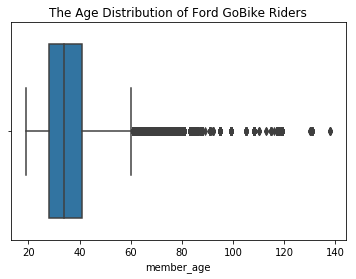

In [17]:
base_color = sb.color_palette()[0]

sb.boxplot(data=fordbike_2018_clean, x='member_age', color=base_color)
plt.title("The Age Distribution of Ford GoBike Riders");

In [18]:
q1, q3= np.percentile(fordbike_2018_clean.member_age.dropna(),[25,75])
iqr = q3 - q1
maximum = q3 + (iqr*1.5)
print ("Maximum = " + str(maximum))

Maximum = 60.5


From the box plot above we can see there are outliers. The maximum from the box plot is 60.5, so we will drop bikers above age 60.

In [19]:
fordbike_2018_clean=fordbike_2018_clean[fordbike_2018_clean['member_age'] <=60]

In [20]:
fordbike_2018_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06
mean,7.770344e+02,3.776626e+01,-1.223483e+02,3.776635e+01,-1.223477e+02,1.983908e+03,3.509174e+01
std,1.985384e+03,1.068892e-01,1.695276e-01,1.067575e-01,1.691045e-01,9.114289e+00,9.114289e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.959000e+03,1.900000e+01
25%,3.450000e+02,3.777041e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.979000e+03,2.800000e+01
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778107e+01,-1.223959e+02,1.986000e+03,3.300000e+01
75%,8.400000e+02,3.779581e+01,-1.222831e+02,3.779625e+01,-1.222876e+02,1.991000e+03,4.000000e+01
max,8.628100e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,6.000000e+01


In [21]:
fordbike_2018_clean.shape

(1708250, 21)

In [22]:
# Save clean data to csv
fordbike_2018_clean.to_csv('fordbike_2018_master.csv', encoding='utf-8', index=False)

### Investigation Overview
In this investigation, I want to look at the relationship between the different groups (age, gender and user type) and popular biking times(time of the month, day of the week and hour of the day).


### Dataset Overview
This project  explores a dataset containing Bay Wheels's bike trip data for 2018.
The data consists of information for 1,863,721 bike trips, including duration, start time, end time, user type, member birth year, member gender and other bike trip features.

## Univariate Exploration

I'll start by looking at the different categorical data types

First we'll start with Member Gender

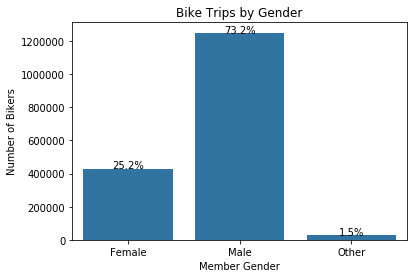

In [23]:
# create the plot
sb.countplot(data = fordbike_2018_clean, x = 'member_gender', color = base_color)
plt.title("Bike Trips by Gender")
plt.xlabel("Member Gender")
plt.ylabel("Number of Bikers")

# add annotations
n_points = fordbike_2018_clean.shape[0]
cat_counts = fordbike_2018_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k');

73.2 % of bikers are Male, 25.2% of bikers are Female and 1.5% of bikers are categrized as Other

Next, let's take a look at the member ages groups

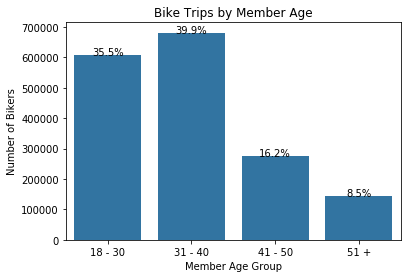

In [24]:
level_order = ['18 - 30', '31 - 40', '41 - 50', '51 +']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
fordbike_2018_clean['member_age_group'] = fordbike_2018_clean['member_age_group'].astype(ordered_cat)

# create the plot
sb.countplot(data = fordbike_2018_clean, x = 'member_age_group', color = base_color)
plt.title("Bike Trips by Member Age")
plt.xlabel("Member Age Group")
plt.ylabel("Number of Bikers")

# add annotations
n_points = fordbike_2018_clean.shape[0]
cat_counts = fordbike_2018_clean['member_age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k');

Majority of the members are between the ages 31-40

Next we'll look at User Type

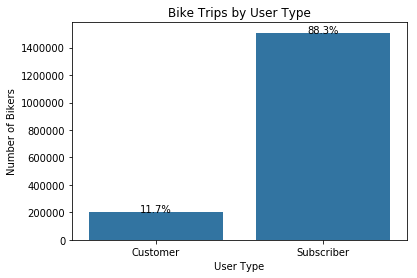

In [25]:
# create the plot
sb.countplot(data = fordbike_2018_clean, x = 'user_type', color = base_color)
plt.title("Bike Trips by User Type")
plt.xlabel("User Type")
plt.ylabel("Number of Bikers")

# add annotations
n_points = fordbike_2018_clean.shape[0]
cat_counts = fordbike_2018_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k');

88.3% of bikers are Subscribers and 11.7% are Customers

Next we'll look at Bike Trips by Month

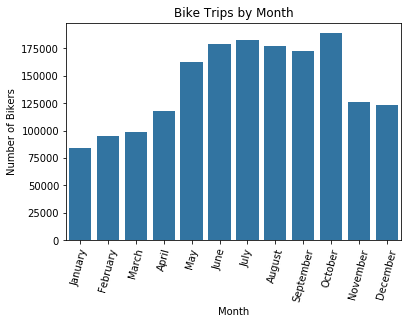

In [26]:
# covert start_time_month to an ordered categorical type
level_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
fordbike_2018_clean['start_time_month'] = fordbike_2018_clean['start_time_month'].astype(ordered_cat)

sb.countplot(data = fordbike_2018_clean, x = 'start_time_month', color = base_color)
plt.title("Bike Trips by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

October has the most bike trips in 2018 while January has the least

Next we'll look at Bike Trips by Day of the Week

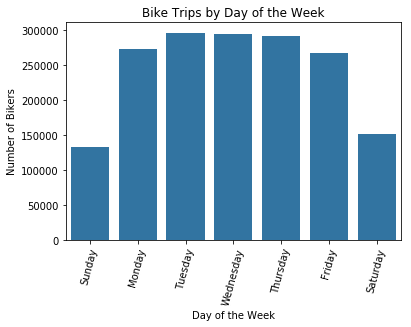

In [27]:
# covert start_time_dayofweek to an ordered categorical type
level_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
fordbike_2018_clean['start_time_dayofweek'] = fordbike_2018_clean['start_time_dayofweek'].astype(ordered_cat)

sb.countplot(data = fordbike_2018_clean, x = 'start_time_dayofweek', color = base_color)
plt.title("Bike Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

Tuesdays have the most bike trips while Sundays and Saturdays have the least. This is interesting because I thought the weekends would have more trips since people have more time in the days for leisure. Perhaps bikers are using the service for commuting purposes.

Next we'll look at Bike Trips by Hour of the Day

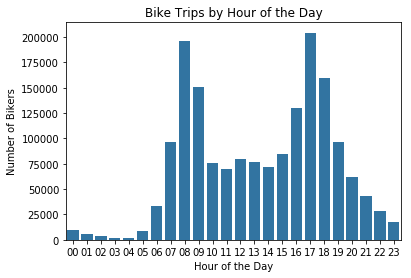

In [28]:
# covert start_time_dayofweek to an ordered categorical type
'''
level_order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', 
              '17', '18', '19', '20', '21', '22', '23']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
fordbike_2018_clean['start_time_hour'] = fordbike_2018_clean['start_time_hour'].astype(ordered_cat)
'''

sb.countplot(data = fordbike_2018_clean, x = 'start_time_hour', color = base_color)
plt.title("Bike Trips by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Bikers");

We can see there are two peak hours 8 and 17 (8:00 AM and 5:00 PM). This supports the previous observation that bikers are using the service for commuting.

And finally let's look at the distribution of bike trip duration

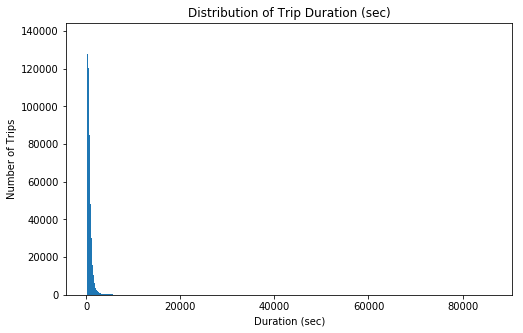

In [29]:
binsize = 60
bin_edges = np.arange(0, fordbike_2018_clean['duration_sec'].max(), binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordbike_2018_clean, x = 'duration_sec', bins = bin_edges)
plt.title("Distribution of Trip Duration (sec)")
plt.xlabel("Duration (sec)")
plt.ylabel("Number of Trips");

In [30]:
fordbike_2018_clean['duration_sec'].max()

86281

The max duration_seconds seems abnomally high and unusual. 86,281 seconds = 23 hours seems invalid

In [31]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = fordbike_2018_clean['duration_sec'] > 5000

# keep only the data below high outliers
fordbike_2018_clean = fordbike_2018_clean.loc[-high_outliers]

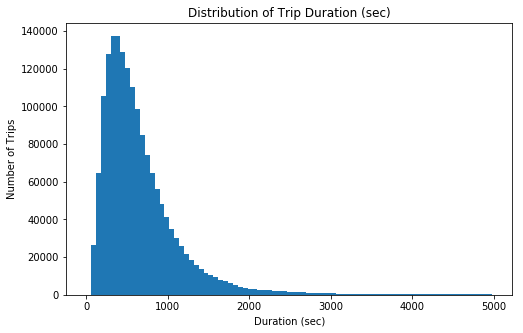

In [32]:
binsize = 60
bin_edges = np.arange(0, fordbike_2018_clean['duration_sec'].max(), binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordbike_2018_clean, x = 'duration_sec', bins = bin_edges)
plt.title("Distribution of Trip Duration (sec)")
plt.xlabel("Duration (sec)")
plt.ylabel("Number of Trips");

From this histgram, we can see that the histogram is right-skewed and majority of the trips are about 500 seconds long (approximately 8 minutes). 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

When investigating start_time_dayofweek, I found it unusual that more points were on Tuesdays rather than weekends because I assumed people would have more time to go biking on their day of leisure. No transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the duartion_sec variable, a number of outlier points were identified. The maximum value seemed abnormally high, so by eyeballing the diagram, I used a point of reference that seemed valid. For safety, all of these points were removed from the dataset to move forward.

## Bivariate Exploration

Since majority of the bikers are male and seem to be between at 18-40. Let's plot that.

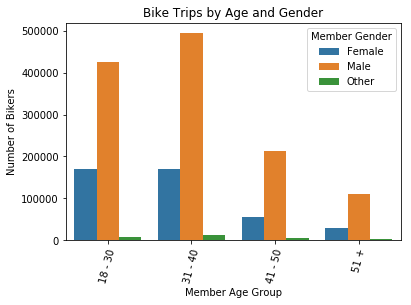

In [48]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'member_age_group', hue = 'member_gender')
ax.legend(title = 'Member Gender')
plt.title("Bike Trips by Age and Gender")
plt.xlabel("Member Age Group")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

The plot above confirms that majority of bikers are Male between the age of 31-40

Let's first look at the Gender and Start Month

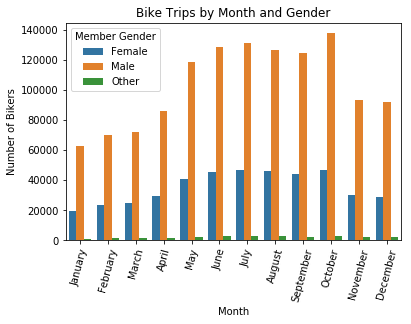

In [34]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_month', hue = 'member_gender')
ax.legend(title = 'Member Gender')
plt.title("Bike Trips by Month and Gender")
plt.xlabel("Month")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

The trend seems to be consistent for both Male and Female gender across the months. However, more Males bike in October, while Females bike in most in July and October.

Next, let's look at Gender and Start Day of the Week

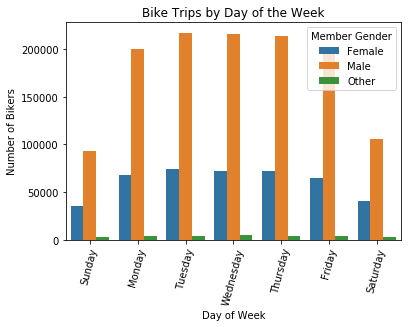

In [35]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_dayofweek', hue = 'member_gender')
ax.legend(title = 'Member Gender')
plt.title("Bike Trips by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

The trend seems to be consistent for both Male and Female gender across the days of the week. So it doesn't seem like gender has any efefct on the day of the week that bikers ride.

Next, let's look at Gender and Start Hour 

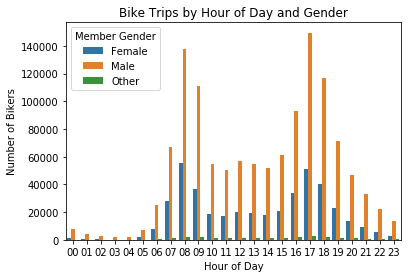

<Figure size 720x360 with 0 Axes>

In [36]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_hour', hue = 'member_gender')
ax.legend(title = 'Member Gender')
plt.title("Bike Trips by Hour of Day and Gender")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bikers")
plt.figure(figsize=[10, 5]);

Both Male and Female genders have bimodal hours hours 8 and 17 (8:00 AM and 5:00 PM). Gender doesn't seem to have effect most frequent on hour of day.

Finally, let's look at Gender and Trip Duration

/root/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


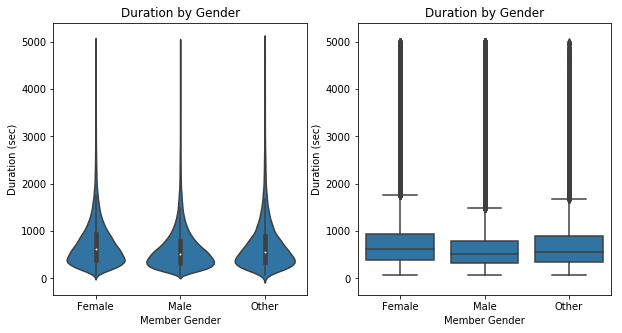

In [37]:
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = fordbike_2018_clean, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title("Duration by Gender")
plt.xlabel("Member Gender")
plt.ylabel("Duration (sec)")

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = fordbike_2018_clean, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title("Duration by Gender")
plt.xlabel("Member Gender")
plt.ylabel("Duration (sec)")

plt.ylim(ax1.get_ylim()); 

We can see females tend to have longer trip durations than Males

Now, let's first look at the Age Group and Month

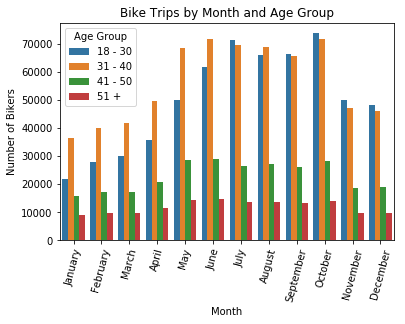

<Figure size 2160x1440 with 0 Axes>

In [38]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_month', hue = 'member_age_group')
ax.legend(title = 'Age Group')
plt.title("Bike Trips by Month and Age Group")
plt.xlabel("Month")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75)
plt.figure(figsize=[30, 20]);

We can see that between Januray and June, most bikers range between ages 31-40, while July to December, most bikers range between ages 18-30. Also, as expected, younger age groups overeall bike more than older age groups.

Now, let's first look at the Age Group and Day of the week

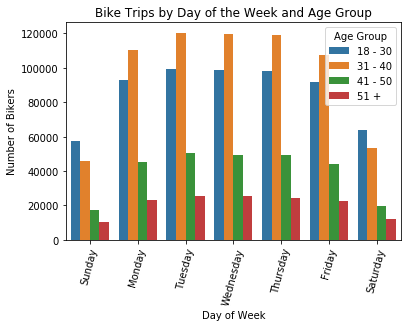

<Figure size 2160x1440 with 0 Axes>

In [39]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_dayofweek', hue = 'member_age_group')
ax.legend(title = 'Age Group')
plt.title("Bike Trips by Day of the Week and Age Group")
plt.xlabel("Day of Week")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75)
plt.figure(figsize=[30, 20]);

We can still see that most bikers bike on Tuesday. However, during the week, most bikers range between age 31-40, while on the weekends most bikers range between ages 18-30.

Now, let's first look at the Age Group and Hour of Day

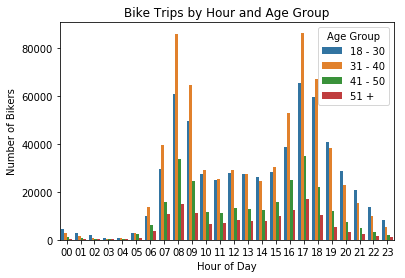

<Figure size 3600x2160 with 0 Axes>

In [40]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_hour', hue = 'member_age_group')
ax.legend(title = 'Age Group')
plt.title("Bike Trips by Hour and Age Group")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bikers")
plt.figure(figsize=[50, 30]);

We still have bimodal hours hours 8 and 17 (8:00 AM and 5:00 PM) for all age groups. However,  we can see the age group 18-30 bike more than other age groups during really early and really late hours (before 5:00 AM and after 7:00 PM)

Now, let's first look at the Age Group and Trip Duration

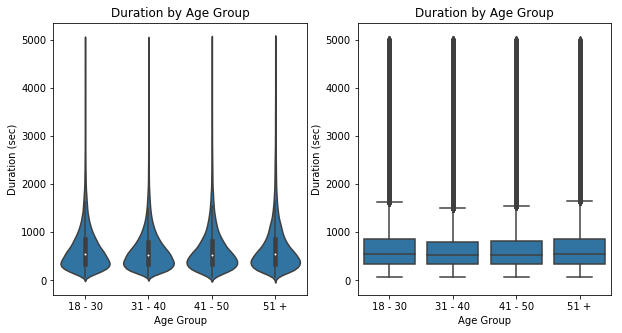

In [41]:
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = fordbike_2018_clean, x = 'member_age_group', y = 'duration_sec', color = base_color)
plt.title("Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Duration (sec)")

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = fordbike_2018_clean, x = 'member_age_group', y = 'duration_sec', color = base_color)
plt.title("Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Duration (sec)")
plt.ylim(ax1.get_ylim()); 

Age groups 18-30 and 51+ have a slight longer trip duration time but it doesn't seem strongly suggest that age group affects trip duration.

Next let's look at the User Type and Month

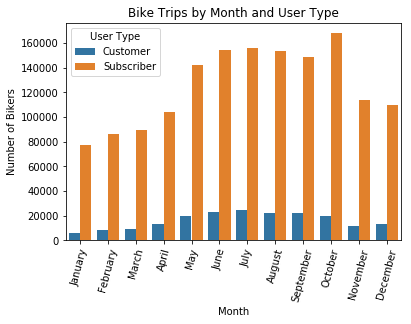

In [42]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_month', hue = 'user_type')
ax.legend(title = 'User Type')
plt.title("Bike Trips by Month and User Type")
plt.xlabel("Month")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

The overall trend looks the same for both Customers an Subscribers. However, more Subscribers make trips in October, while more Customers make trips in July.

Next, let's look at User Type and Day of the Week

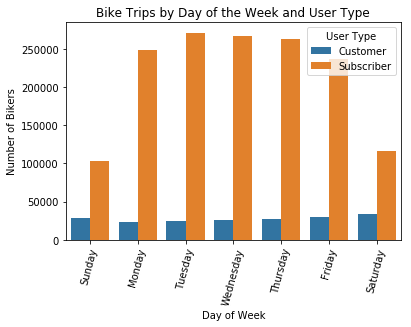

In [43]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_dayofweek', hue = 'user_type')
ax.legend(title = 'User Type')
plt.title("Bike Trips by Day of the Week and User Type")
plt.xlabel("Day of Week")
plt.ylabel("Number of Bikers")
plt.xticks(rotation = 75);

For Customers and Subsribers our trends are different for Day of the Week a trip occured. Subscribers tends to take more trips during the week while Customers take more trips during the weekends (Saturday and Sunday)

Next, let's look at User Type and Hour of the Day

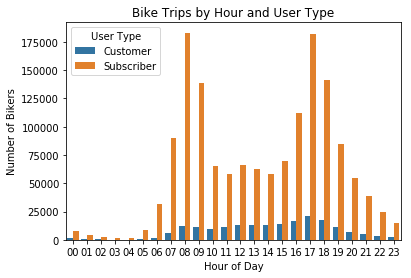

<Figure size 720x360 with 0 Axes>

In [44]:
ax = sb.countplot(data = fordbike_2018_clean, x = 'start_time_hour', hue = 'user_type')
ax.legend(title = 'User Type')
plt.title("Bike Trips by Hour and User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bikers")
plt.figure(figsize=[10, 5]);

We still have bimodal hours hours 8 and 17 (8:00 AM and 5:00 PM) for both Subscribers and Customers

Now, let's first look at the User Type and Trip Duration

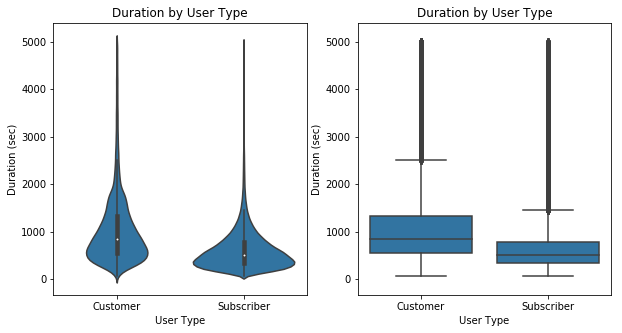

In [45]:
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = fordbike_2018_clean, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title("Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Duration (sec)")

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = fordbike_2018_clean, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title("Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Duration (sec)")
plt.ylim(ax1.get_ylim()); 

Customers tend to have longer trip duration than subscribers. We can also see from the violin plot that subsribers  occurences of trip duration at arounf 400 seconds than customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For the most part, gender didn't seem to have much effect on the month, day of week or hour of day but we could see that females tend to have a slightly longer trip duration. 

The age group had interesting observations. As expected, the two younger age groups bike more than older age groups. But interestingly, between Januray and June, most bikers range between ages 31-40, while July to December, most bikers range between ages 18-30. Another intersting observation from the age groups is during the week, most bikers range between age 31-40, while on the weekends most bikers range between ages 18-30. We could see most bikers travel at 8:00 AM and 5:00 PM. This indicates they potentially are using the service for commuting to and from work. This is possibly due to the late night outings in the 18-30 age group in comparison to others and some possibly don't have cars to drive.





### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found between gender, month, day of week or hour of day and trip duration. I found it interesting that the youngest age group category, 18-30 travel the most at really early and really late hours (before 5:00 AM and after 7:00 PM).

Subscribers tends to take more trips during the week while Customers take more trips during the weekends (Saturday and Sunday) possibly because they are using the service for occasional leisure rather than commuting and trying it for the first time before subsribing. Also, customers tend to have longer trip duration than subscribers possibly because they are leisurely travel. 

## Multivariate Exploration

Let's take a look at gender, user type and trip duration

/root/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/root/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


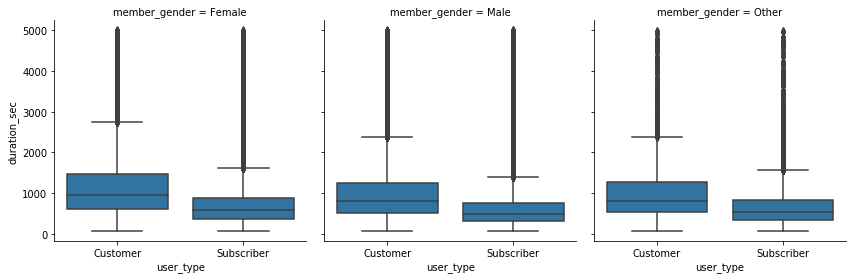

In [46]:
g = sb.FacetGrid(data = fordbike_2018_clean, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec')

Female Customers have longer trip duratin than Male Customers.

Now let's look at memger age group, gender and user type

/root/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/root/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


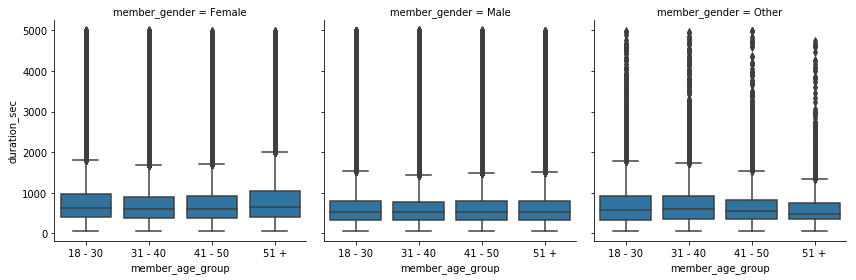

In [47]:
g = sb.FacetGrid(data = fordbike_2018_clean, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'member_age_group', 'duration_sec')

There is not much variation in the Female age groups to Male age groups

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Female Customers have longer trip duratin than Male Customers. This strengthened the fact that females take a longer time to bike than males.

### Were there any interesting or surprising interactions between features?

I found it  surprising that there is not much variation in the Female age groups to Male age groups with respect to duration since overal females had longer trip durations.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!